# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739411e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343912e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005066e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149245e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908451e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides.head()


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers = pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fares / total_rides
avg_fare_per_ride.head() 


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["driver_count"].count()
avg_fare_per_driver

type
Rural        1.822286
Suburban     8.150034
Urban       16.780792
Name: fare, dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary = pd.DataFrame({"Total Rides": total_rides,
                                 "Total Drivers": total_drivers,
                                 "Total Fares": total_fares, 
                                 "Average Fare Per Ride": avg_fare_per_ride,
                                 "Average Fare Per Driver": avg_fare_per_driver})

pyber_summary.head()
                                 

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,1.822286
Suburban,625,8570,19356.33,30.970128,8.150034
Urban,1625,59602,39854.38,24.525772,16.780792


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary.index.name = None
pyber_summary

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,537,4327.93,34.623440,1.822286
Suburban,625,8570,19356.33,30.970128,8.150034
Urban,1625,59602,39854.38,24.525772,16.780792


In [10]:
#  8. Format the columns.
pyber_summary.loc[:, "Total Fares"] = pyber_summary["Total Fares"].map('${:.2f}'.format)
pyber_summary.loc[:, "Average Fare Per Ride"] = pyber_summary ["Average Fare Per Ride"].map('${:.2f}'.format)
pyber_summary.loc[:, "Average Fare Per Driver"] = pyber_summary["Average Fare Per Driver"].map('${:.2f}'.format)
pyber_summary

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,537,$4327.93,$34.62,$1.82
Suburban,625,8570,$19356.33,$30.97,$8.15
Urban,1625,59602,$39854.38,$24.53,$16.78


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])


In [12]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_sums_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
fare_sums_df.head()

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26

In [13]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_sums_df = fare_sums_df.reset_index()
fare_sums_df.head()

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_sums_df_pivot = fare_sums_df.pivot(index="date", columns="type", values="fare")
fare_sums_df_pivot.head()

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_sums_Jan_df = fare_sums_df_pivot.loc['1/1/2019':'4/29/2019']
fare_sums_Jan_df 

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
4/28/2019 4:34,NaN,NaN,40.46
4/28/2019 8:15,NaN,NaN,22.86
4/28/2019 9:03,NaN,NaN,15.00


In [16]:
#type_date_Jan_Apr = type_date_Jan_Apr.reset_index()
#type_date_Jan_Apr.head(10)

In [17]:
#type_date_Jan_Apr.dtypes

In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
#type_date_Jan_Apr['date'] = pd.to_datetime(type_date_Jan_Apr['date'])
fare_sums_Jan_df.index = pd.to_datetime(fare_sums_Jan_df.index)

In [19]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_sums_Jan_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2057 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  538 non-null    float64
 2   Urban     1416 non-null   float64
dtypes: float64(3)
memory usage: 64.3 KB


In [20]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resample_df = fare_sums_Jan_df.resample('W').sum()
resample_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


NameError: name 'ax' is not defined

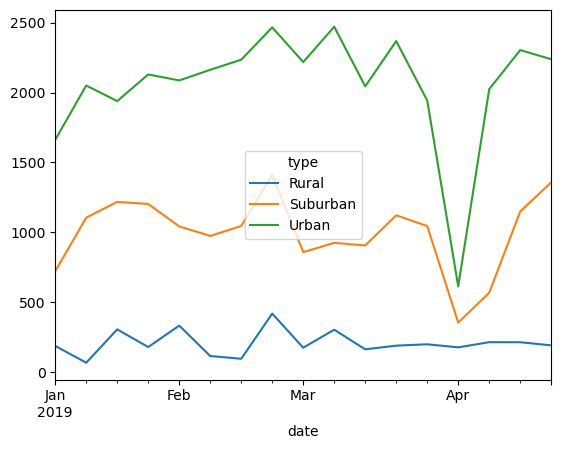

<Figure size 640x480 with 0 Axes>

In [21]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.

resample_df.plot()

fig = plt.figure()
ax.plot = ("date", "fare")
plt.style.use('fivethirtyeight')
ax.set_xlabel('2019')
ax.set_ylabel('Fare ($USD)')
ax.set_title('Total Fare by City Type')
ax.legend("type")
plt.savefig("PyBer_Fare_summary.png")